Proposal codes

In [1]:
library(tidyverse)
library(readxl)
library(ggplot2)
library(gridExtra)
library(repr)
#install.packages("psych")
#library(psych)
library(GGally)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ gridExtra

In [2]:
# show data can be read
options(repr.plot.width = 15, repr.plot.height = 10)

train_data <- read_csv("https://raw.githubusercontent.com/fyang1419/group-56-project/main/train_data.csv") |>
select(STG:UNS)

test_data <- read_csv("https://raw.githubusercontent.com/fyang1419/group-56-project/main/test_data.csv") |>
select(STG:UNS)


#tidy data: turn UNS into factors in both sets of data, then turn to numeric levels starting at 1 for very_low
#clean and wrangle data
train_data <- train_data |>
mutate(UNS = factor(UNS, levels=c('very_low','Low','Middle','High')))

test_data <- test_data |>
mutate(UNS = factor(UNS, levels=c('very_low','Low','Middle','High')))

#turn class levels to 1,2,3,4 (very low, low, middle, high)
#train_data_cleaned<- train_data |>
#mutate(UNS = as.factor(UNS))
#mutate(UNS = as.numeric(UNS)) 

#test_data_cleaned <- test_data |>
#mutate(UNS = factor(as.factor(UNS), levels=(rev(levels(as.factor(UNS)))))) |>
#mutate(UNS = as.factor(as.numeric(UNS)))

#class(train_data_cleaned$UNS)
#head(train_data)
#head(train_data_cleaned)

New names:
• `` -> `...1`
• `...7` -> `...8`
• `...8` -> `...9`
Rows: 258 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UNS, Attribute Information:
dbl (6): ...1, STG, SCG, STR, LPR, PEG
lgl (2): ...8, ...9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
• `...7` -> `...8`
• `...8` -> `...9`
Rows: 145 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UNS, Attribute Information:
dbl (6): ...1, STG, SCG, STR, LPR, PEG
lgl (2): ...8, ...9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
try <- test_data |>
filter(is.na(UNS))
nrow(try)

[1] 26

In [4]:
#Summary table for predictors in train-data
summary_pred_train <- describe(train_data[-6], fast=TRUE)
summary_pred_train

ERROR: Error in describe(train_data[-6], fast = TRUE): could not find function "describe"


In [ ]:
pairs.panels(train_data[,-6], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = FALSE # show correlation ellipses
             )

In [ ]:

ggpairs(train_data, colums=1:5, aes(color=UNS))
        

In [5]:
set.seed(1)
vfold <- vfold_cv(train_data, v = 5, strata = UNS)

recipe <- recipe(UNS ~ STG+STR+PEG, data = train_data) |> 
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 5)) 

knn_results <- workflow() |>
  add_recipe(recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = vfold, grid = gridvals) |>
  collect_metrics() 
accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.6748869,5,0.03633795,Preprocessor1_Model01
6,accuracy,multiclass,0.7527149,5,0.04548524,Preprocessor1_Model02
11,accuracy,multiclass,0.7484917,5,0.03331144,Preprocessor1_Model03
16,accuracy,multiclass,0.7446456,5,0.03293269,Preprocessor1_Model04
21,accuracy,multiclass,0.7408748,5,0.04647937,Preprocessor1_Model05
26,accuracy,multiclass,0.7447964,5,0.04299096,Preprocessor1_Model06
31,accuracy,multiclass,0.7292609,5,0.03778875,Preprocessor1_Model07
36,accuracy,multiclass,0.6981146,5,0.02795173,Preprocessor1_Model08
41,accuracy,multiclass,0.6631976,5,0.02984711,Preprocessor1_Model09


In [6]:
gridvals2 <- tibble(neighbors = seq(from = 1, to = 20, by = 1)) 

knn_results2 <- workflow() |>
  add_recipe(recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = vfold, grid = gridvals2) |>
  collect_metrics() 
accuracies2 <- knn_results2 |>
  filter(.metric == "accuracy")

accuracies2

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.6748869,5,0.03633795,Preprocessor1_Model01
2,accuracy,multiclass,0.6748869,5,0.03633795,Preprocessor1_Model02
3,accuracy,multiclass,0.7175716,5,0.03497409,Preprocessor1_Model03
4,accuracy,multiclass,0.7097285,5,0.03137708,Preprocessor1_Model04
5,accuracy,multiclass,0.7448718,5,0.04027453,Preprocessor1_Model05
6,accuracy,multiclass,0.7527149,5,0.04548524,Preprocessor1_Model06
7,accuracy,multiclass,0.7332579,5,0.04905956,Preprocessor1_Model07
8,accuracy,multiclass,0.7371041,5,0.04724337,Preprocessor1_Model08
9,accuracy,multiclass,0.7214178,5,0.03562608,Preprocessor1_Model09


In [ ]:
# Plot k values against their respective accuracies and choose optimal k value
cross_val_plot <- accuracies |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))
cross_val_plot

In [ ]:
# Plot k values against their respective accuracies and choose optimal k value
cross_val_plot <- accuracies2 |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))
cross_val_plot

In [7]:
test_data <- test_data |>
filter(!is.na(UNS))

knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

fit <- workflow() |>
  add_recipe(recipe) |>
  add_model(knn_best_spec) |>
  fit(data = train_data) 

predictions <- predict(fit, test_data) |> 
    bind_cols(test_data)
predictions

#get accuracy
acc <- predictions |> 
    metrics(truth = UNS, estimate = .pred_class) |>  
    select(.metric, .estimate) |> 
    head(1)
acc

#confusion matrix
cm <-predictions |> 
    conf_mat(truth = UNS, estimate = .pred_class) #confusion matrix
cm

.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Low,0.05,0.05,0.55,0.60,0.14,Low
High,0.08,0.18,0.63,0.60,0.85,High
High,0.20,0.20,0.68,0.67,0.85,High
High,0.22,0.22,0.90,0.30,0.90,High
Low,0.14,0.14,0.70,0.50,0.30,Low
Middle,0.16,0.16,0.80,0.50,0.50,Middle
Low,0.12,0.12,0.75,0.68,0.15,Low
High,0.20,0.20,0.88,0.77,0.80,High
Middle,0.11,0.29,0.20,0.05,0.66,Middle


.metric,.estimate
<chr>,<dbl>
accuracy,0.8571429


          Truth
Prediction very_low Low Middle High
  very_low        0   1      0    0
  Low             0  44      9    0
  Middle          0   1     23    4
  High            0   0      2   35

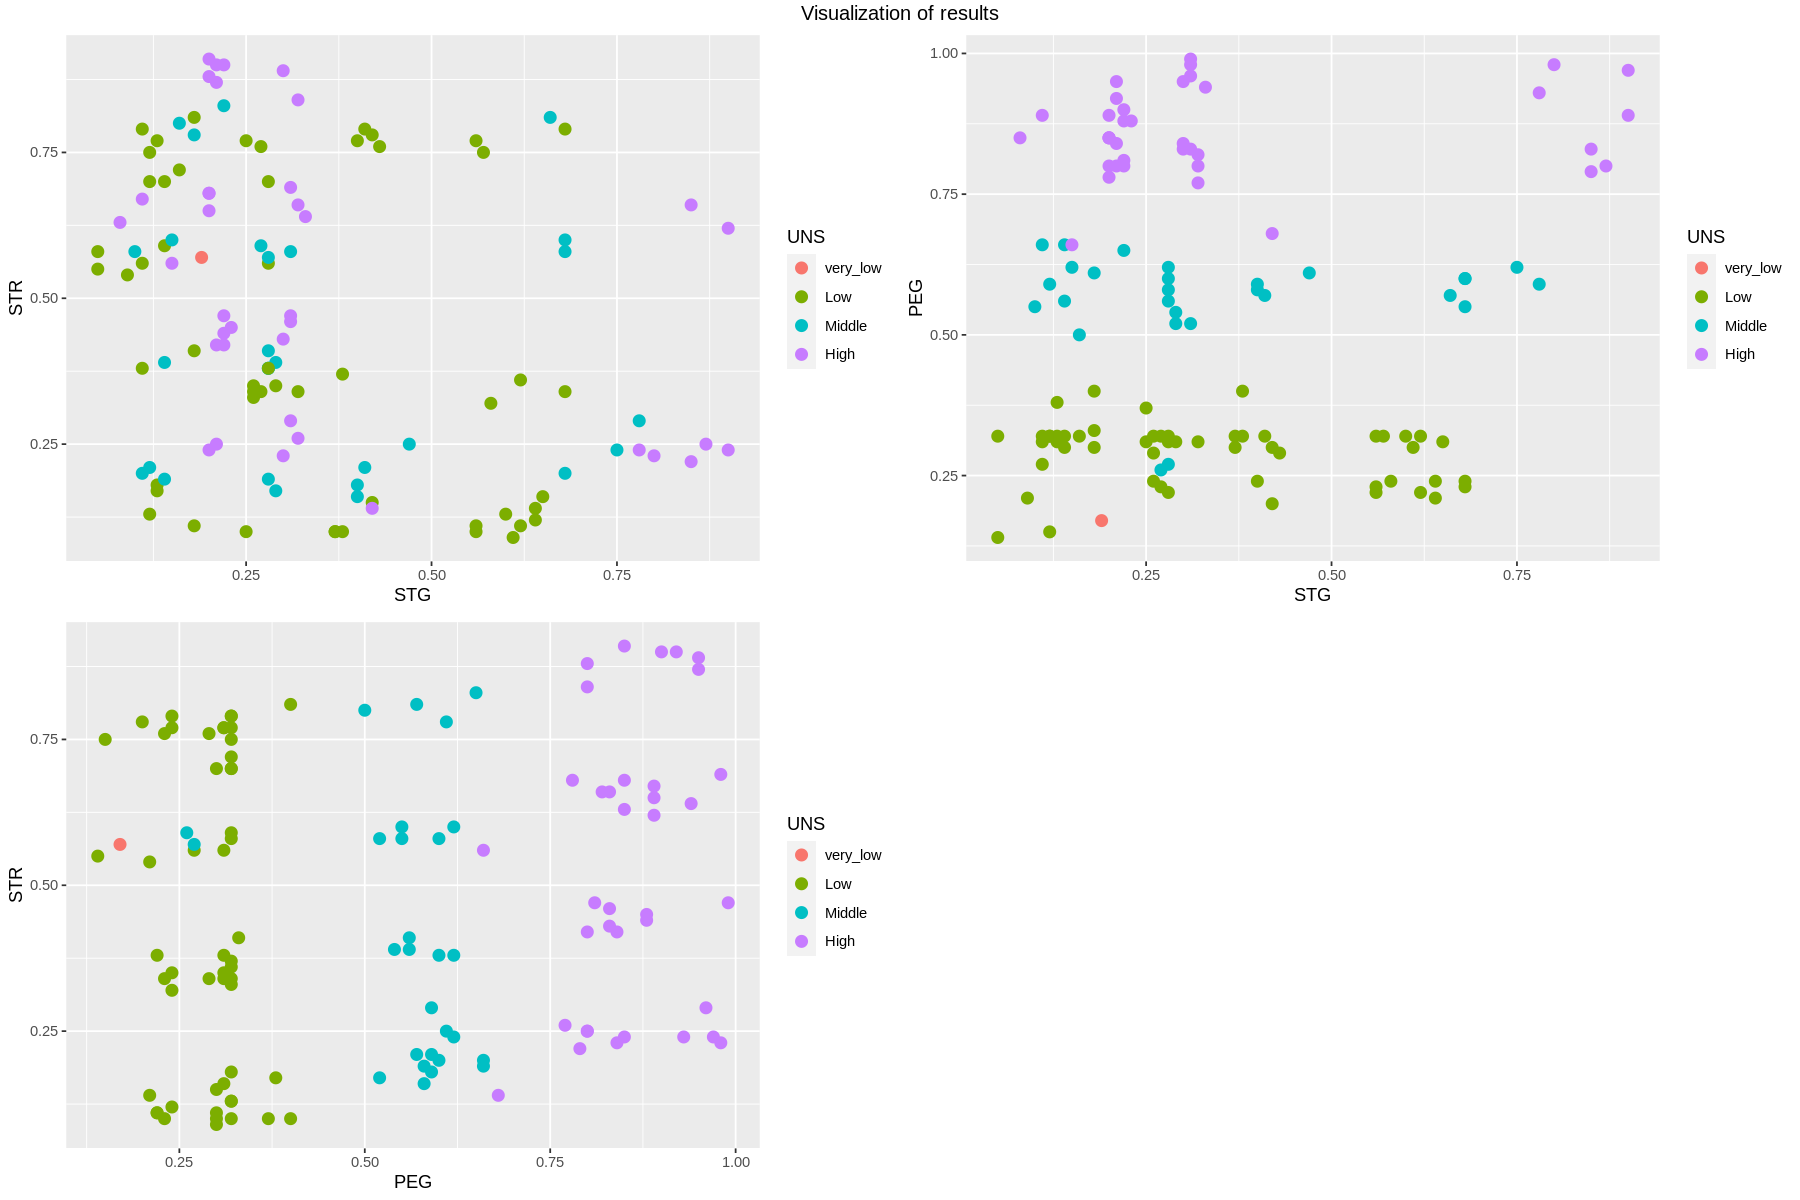

In [13]:
STG_STR <- ggplot(predictions, aes(x=STG, y=STR, color=.pred_class)) +
geom_point() +
labs(x="STG", y="STR", color="UNS") +
 geom_point(size = 3) 

STG_PEG <- ggplot(predictions, aes(x=STG, y=PEG, color=.pred_class)) +
geom_point() +
labs(x="STG", y="PEG", color="UNS") +
 geom_point(size = 3) 

PEG_STR <- ggplot(predictions, aes(x=PEG, y=STR, color=.pred_class)) +
geom_point() +
labs(x="PEG", y="STR", color="UNS") +
 geom_point(size = 3) 

grid.arrange(STG_STR, STG_PEG, PEG_STR, nrow=2, top="Visualization of results")